# Lab1: Play with IRIS Data

In this notebook we'll play with IRIS data, an introductory datset for Data Learners. Here we will plot Iris data using python. Get your hands dirty!

#### Dataset information:

This is perhaps the best known database to be found in the data science literature. The data set contains 3 classes 
of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; 
the latter are NOT linearly separable from each other. 

#### Attribute information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa; Iris Versicolour; Iris Virginica


#### We'll use three libraries: [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), and [seaborn](http://stanford.edu/~mwaskom/software/seaborn/).

In [1]:
from IPython.display import Image
Image(url='https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png')

# 1  Import data

Try to:
1. Import the dataset from the file 'iris.data.txt'

In [2]:
import pandas as pd

df = pd.read_csv('iris.data.txt', sep = ',')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2 Check data description

Take a look at Data! This is the first thing you should do when you start to work on any dataset.

Try to:
1. Dig some information on attributes, rows and columns, e.g., the number of rows and columns, list the type of each attribute.
2. Observe data from descriptive statistics.

- have a simple look at the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- the number of rows and columns: 150 rows, 5 columns

In [4]:
df.shape

(150, 5)

- the names of 5 attributes: `sepal_length`, `sepal_width`, `petal_length`, `petal_width`, `species`

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

- the type of each attribute: `sepal_length`, `sepal_width`, `petal_length`, `petal_width` are numerical variables, while `species` is a categorical variable.

In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

- the dataset contains 3 classes, each class has 50 rows

In [7]:
df.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

- descriptive statistics of numerical varaibles for the whole data

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- descriptive statistics of numerical varaibles for **different species**

In [9]:
df_new = df.groupby('species')
df_new.describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

# 3 Identify missing values

Try to:
1. Check whether the dataset contains missing values. 
2. If any missing value exists, deal with it.

- no missing values

In [10]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# 4 Data normalization


Try to:
1. Perform z-score normalization on the attributes.

- select the columns of numerical variables

In [11]:
import numpy as np

numeric = df.select_dtypes(include = np.number)
numeric_columns = numeric.columns
df_num = df[numeric_columns]
df_num

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- perform z-score normalization on the attributes

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_num)
df_scaled = df[:].copy(deep = True)
df_scaled[numeric_columns] = scaler.transform(df_num)
df_scaled

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


# 5 Visualize Iris data and get some insight 



Try to:
1.     Use at least one visualization approach
2.     Tell us the characteristics of each class (Iris Setosa, Iris Versicolour and Iris Virginica) from your visualization

- remove 'Iris' from the species' name, e.g.: Iris-setosa $\rightarrow$ setosa

In [13]:
df['species'] = [i.replace('Iris-', '') for i in df['species']]
df_scaled['species'] = [i.replace('Iris-', '') for i in df['species']]

- plot histagrams on attributes: `sepal_length` and `sepal_width` follow unimodal distribution, `petal_length` and `petal_width` follow bimodal distribution.

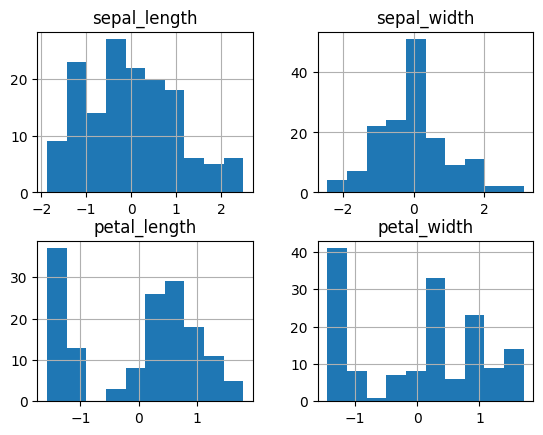

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df_scaled.hist()
plt.show()

- show the boxplot of the four attributes for different species: there exist a few outliers and each species show different features in the four attributes.

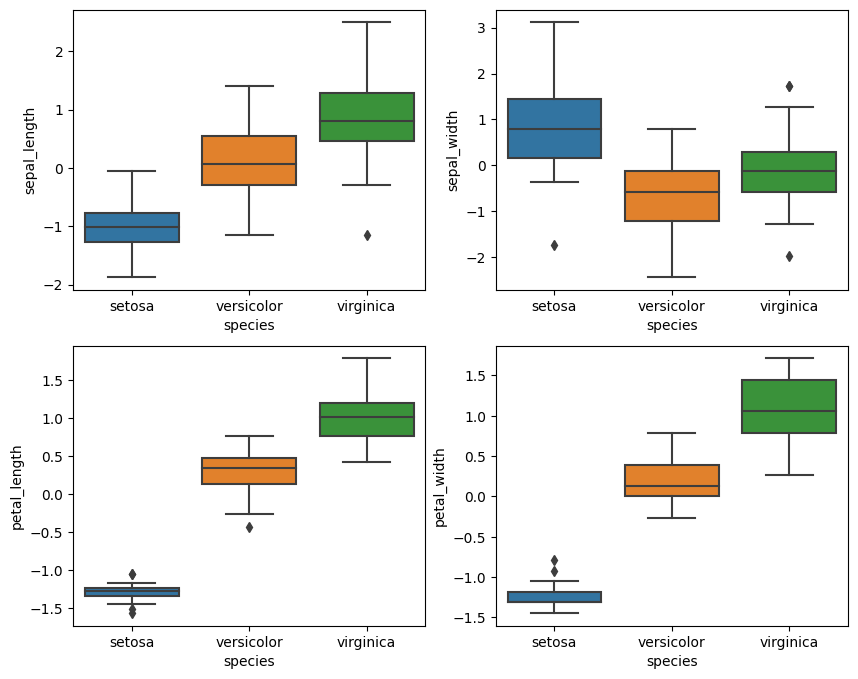

In [15]:
plt.figure(figsize = (10, 8))
plt.rcParams['figure.dpi'] = 100
for i, j in enumerate(df_num.columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df_scaled['species'], y=df_scaled[j])
plt.show()

- plot the correlation heatmap: sepal_length is highly positively correlated to `petal_width` and `petal_length`, `petal_width` and `petal_length` are also highly positively correlated; while `sepal_width` is negatively correlated to three other attributes.

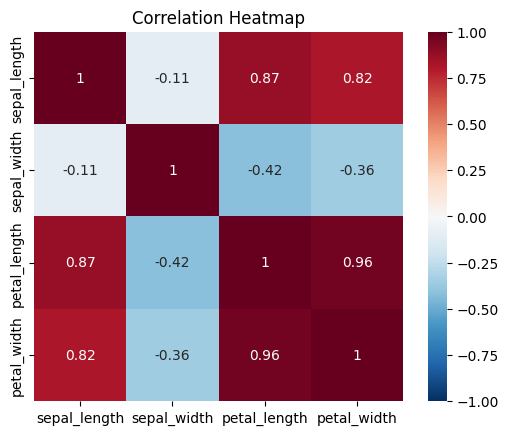

In [16]:
sns.heatmap(df_num.corr(), annot = True, cmap='RdBu_r', square=True, vmax = 1, vmin = -1)
plt.title(f'Correlation Heatmap')
plt.show()

- show the paired scatter plot of attributes: except `sepal_width`, all the attributes can easily help distinguish the three types of Iris.

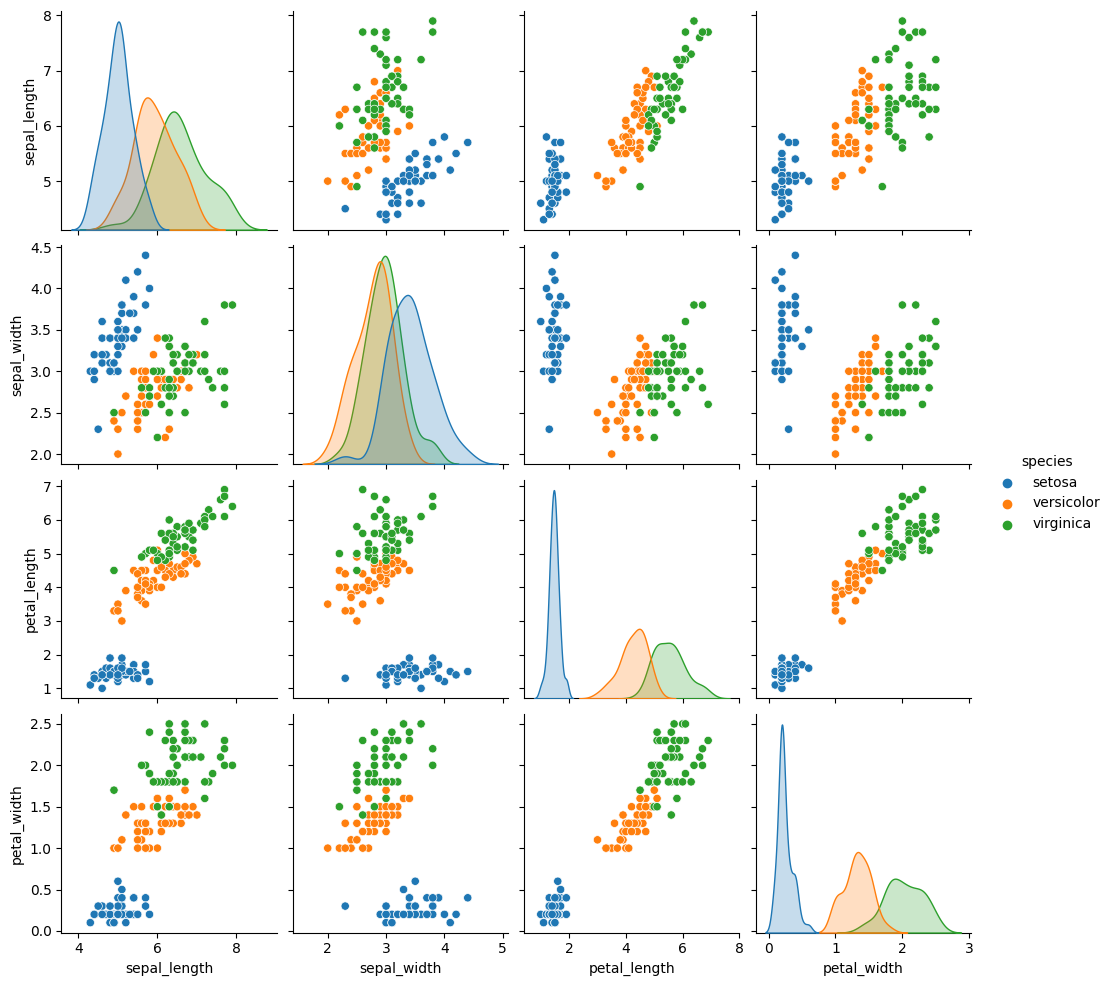

In [17]:
sns.pairplot(data = df, hue = 'species')
plt.show()

- use parallel coordinates, plot each attribute on a separate column: the trends of virginica and versicolor are similar, while setosa is dramatically different from the other species.

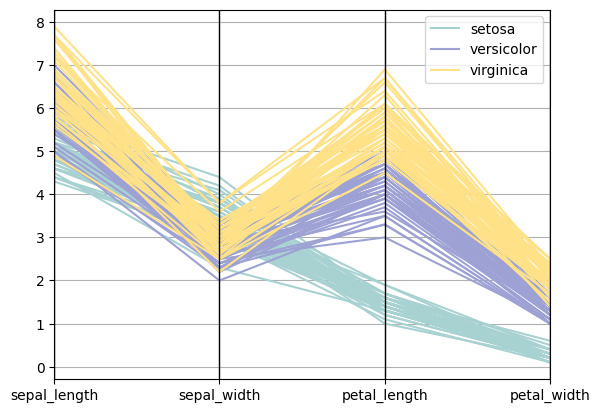

In [18]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, 'species', color = ('#A8D1D1','#9EA1D4','#FFE288'))
plt.show()

- show the 3D scatter plot

In [19]:
def show_3d(df, axs):
    labels = list(set(df.species))
    fig = plt.figure(figsize=(6,6), dpi=150)
    ax = fig.add_subplot(projection='3d')
    colorlist = sns.color_palette('hls', 3)
    for idx, color in enumerate(colorlist):
        x = df.iloc[:,axs[0]][df.species==labels[idx]]
        y = df.iloc[:,axs[1]][df.species==labels[idx]]
        z = df.iloc[:,axs[2]][df.species==labels[idx]]
        ax.scatter(x,y,z,s=70,color=color)
    ax.set_xlabel(df.columns[axs[0]])
    ax.set_ylabel(df.columns[axs[1]])
    ax.set_zlabel(df.columns[axs[2]])
    plt.subplots_adjust(right=1.8, top=1.8)
    plt.show()

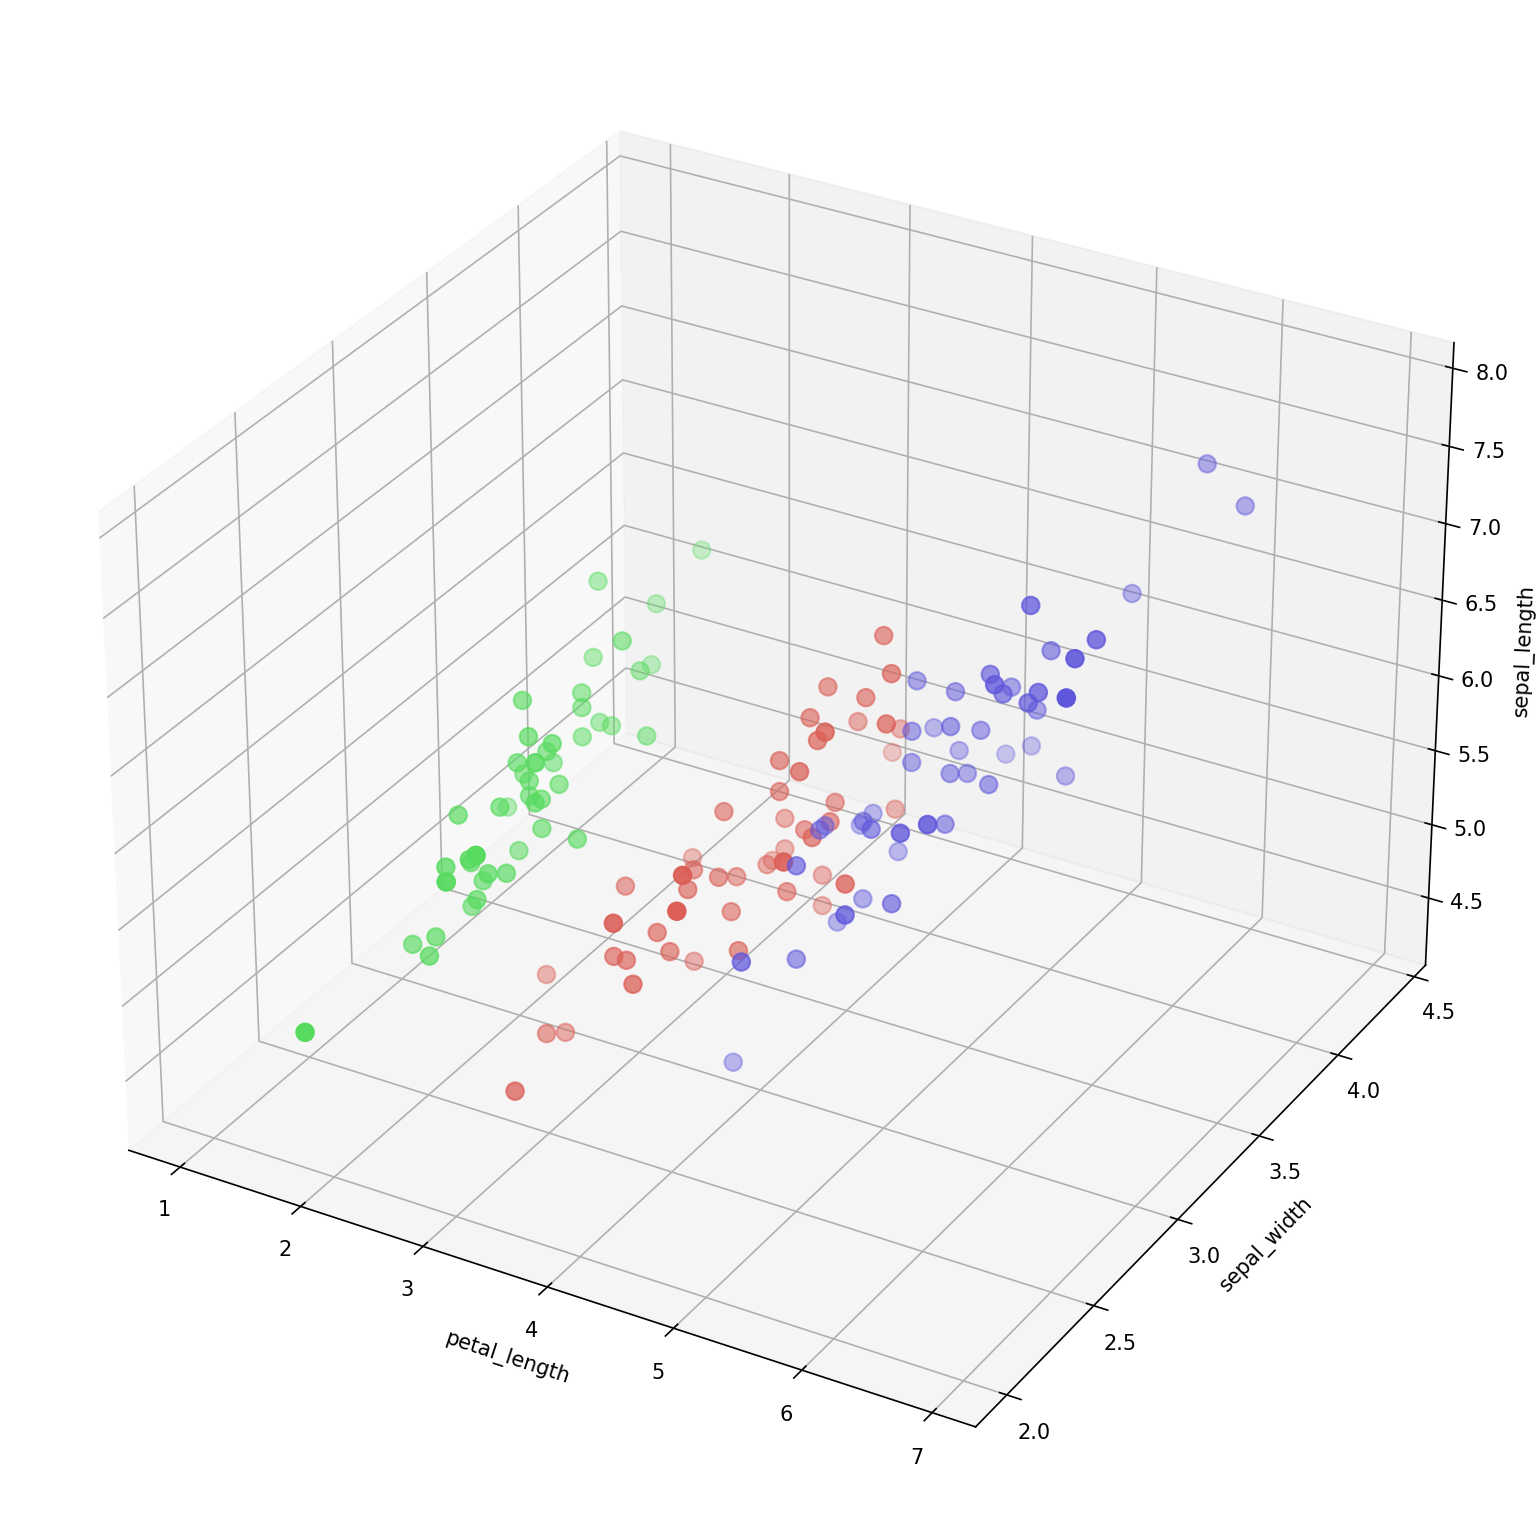

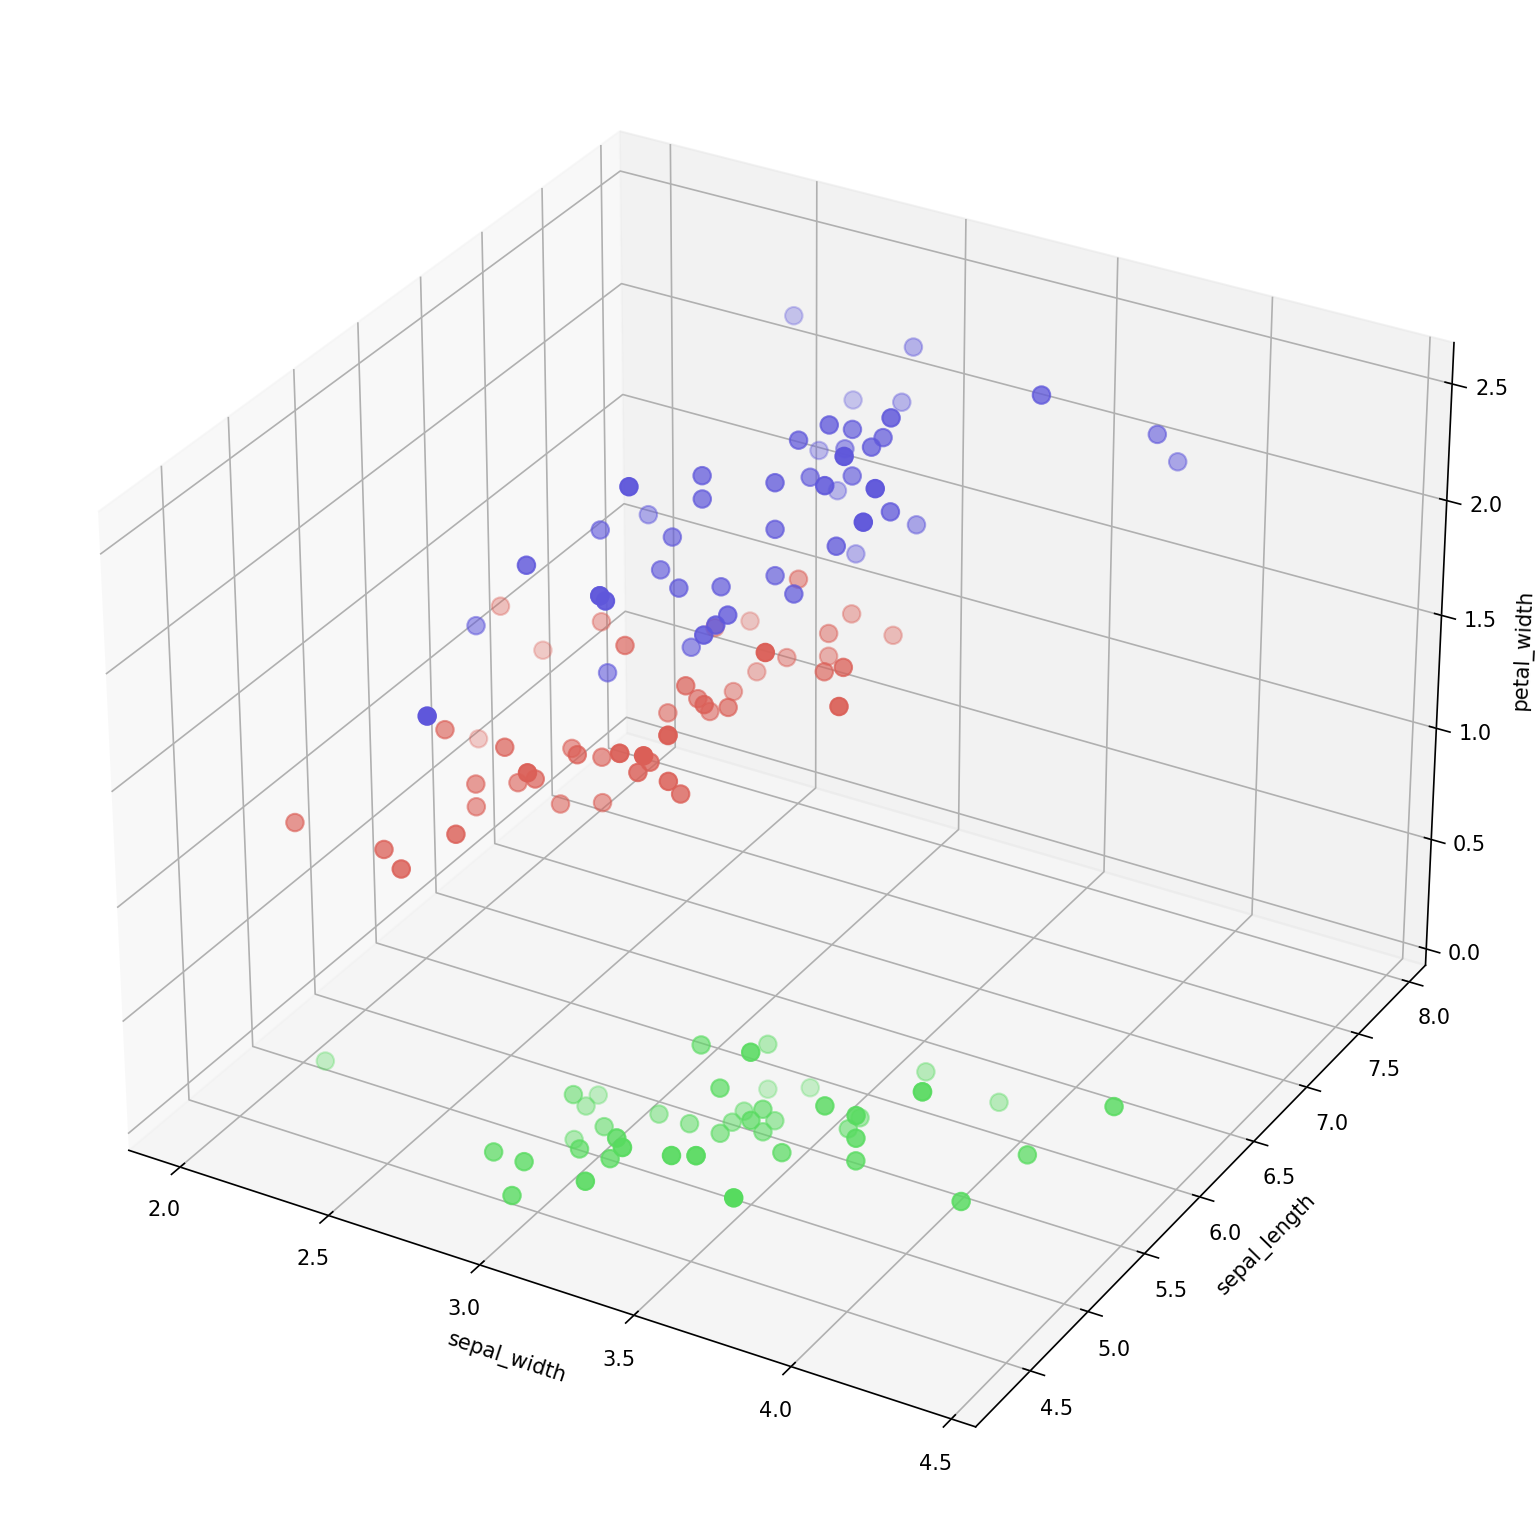

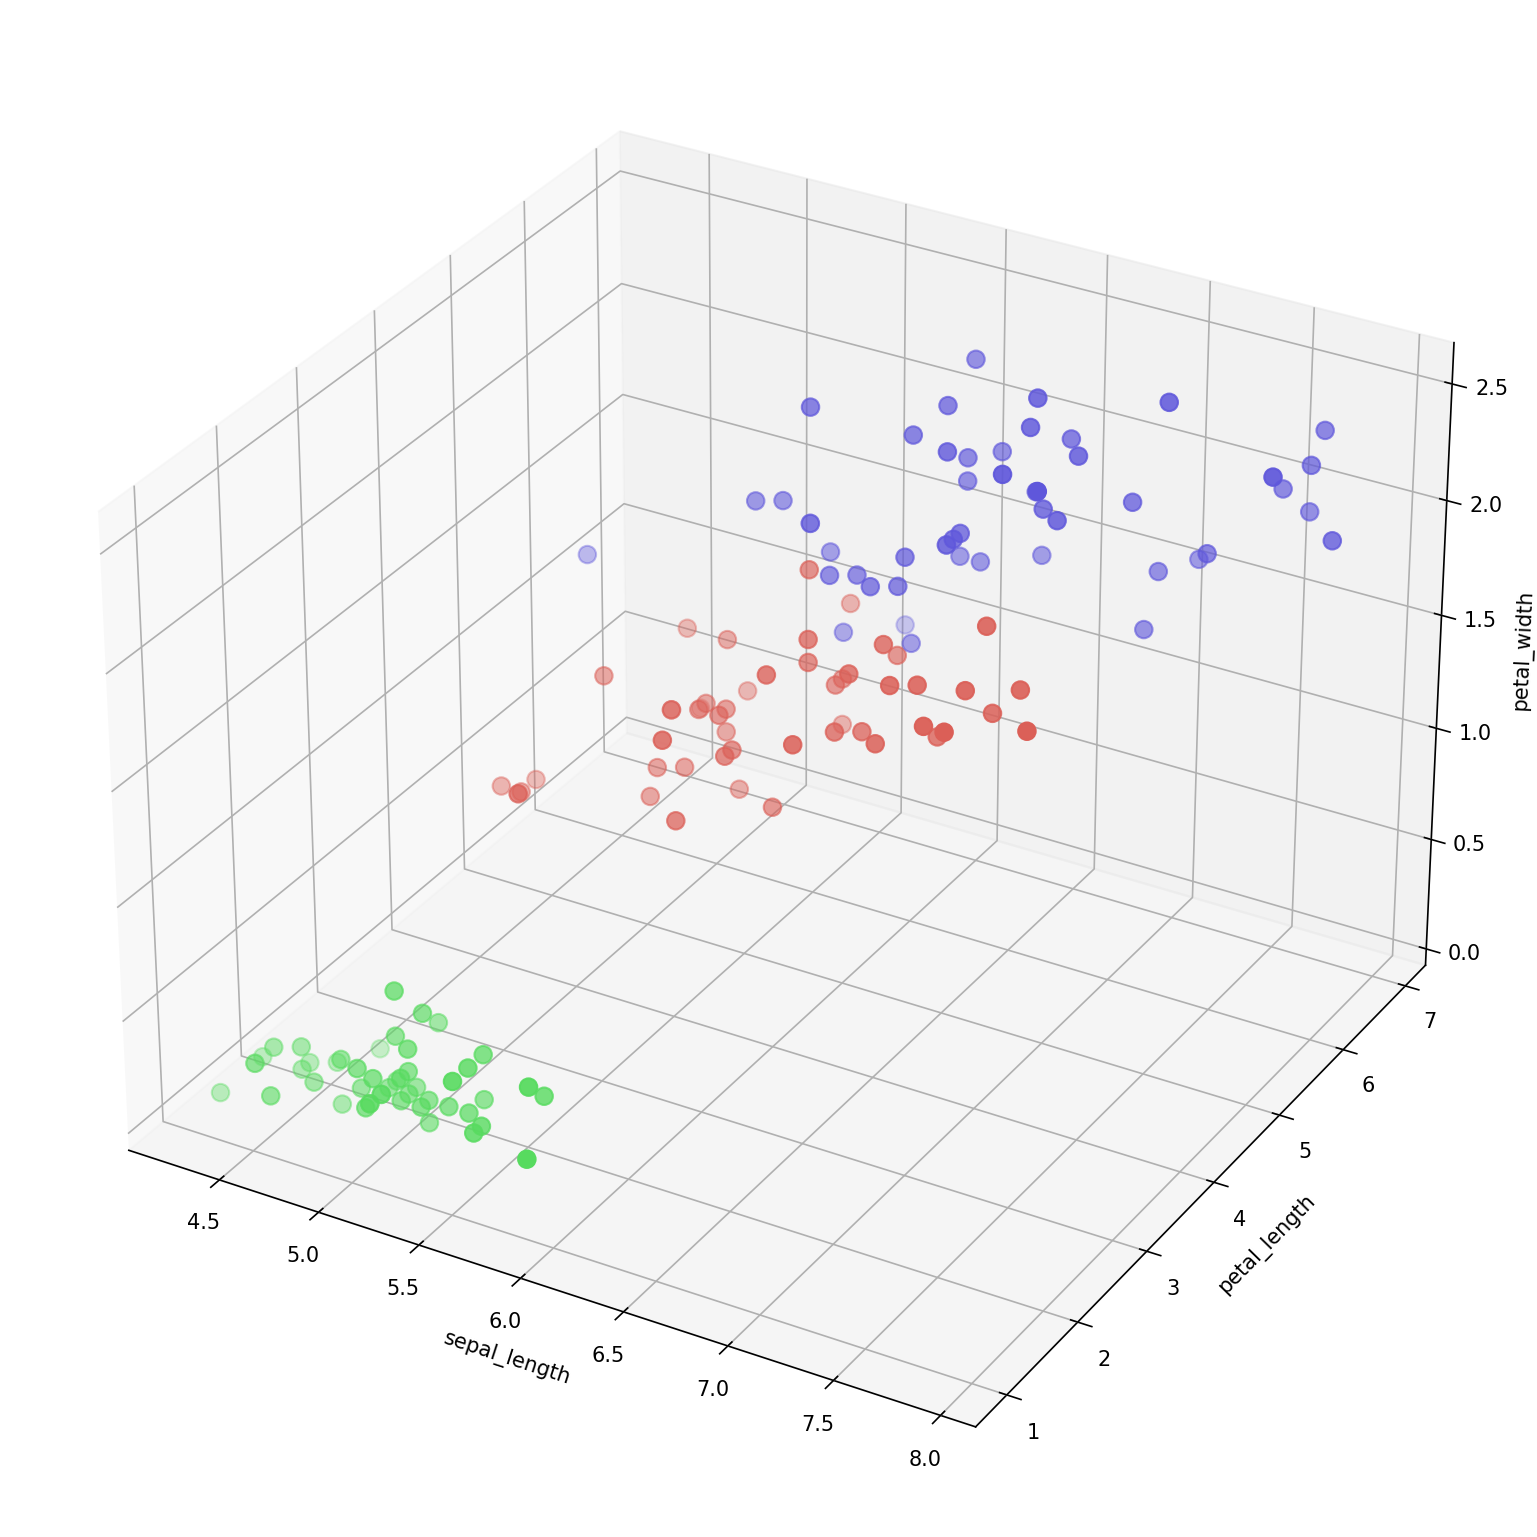

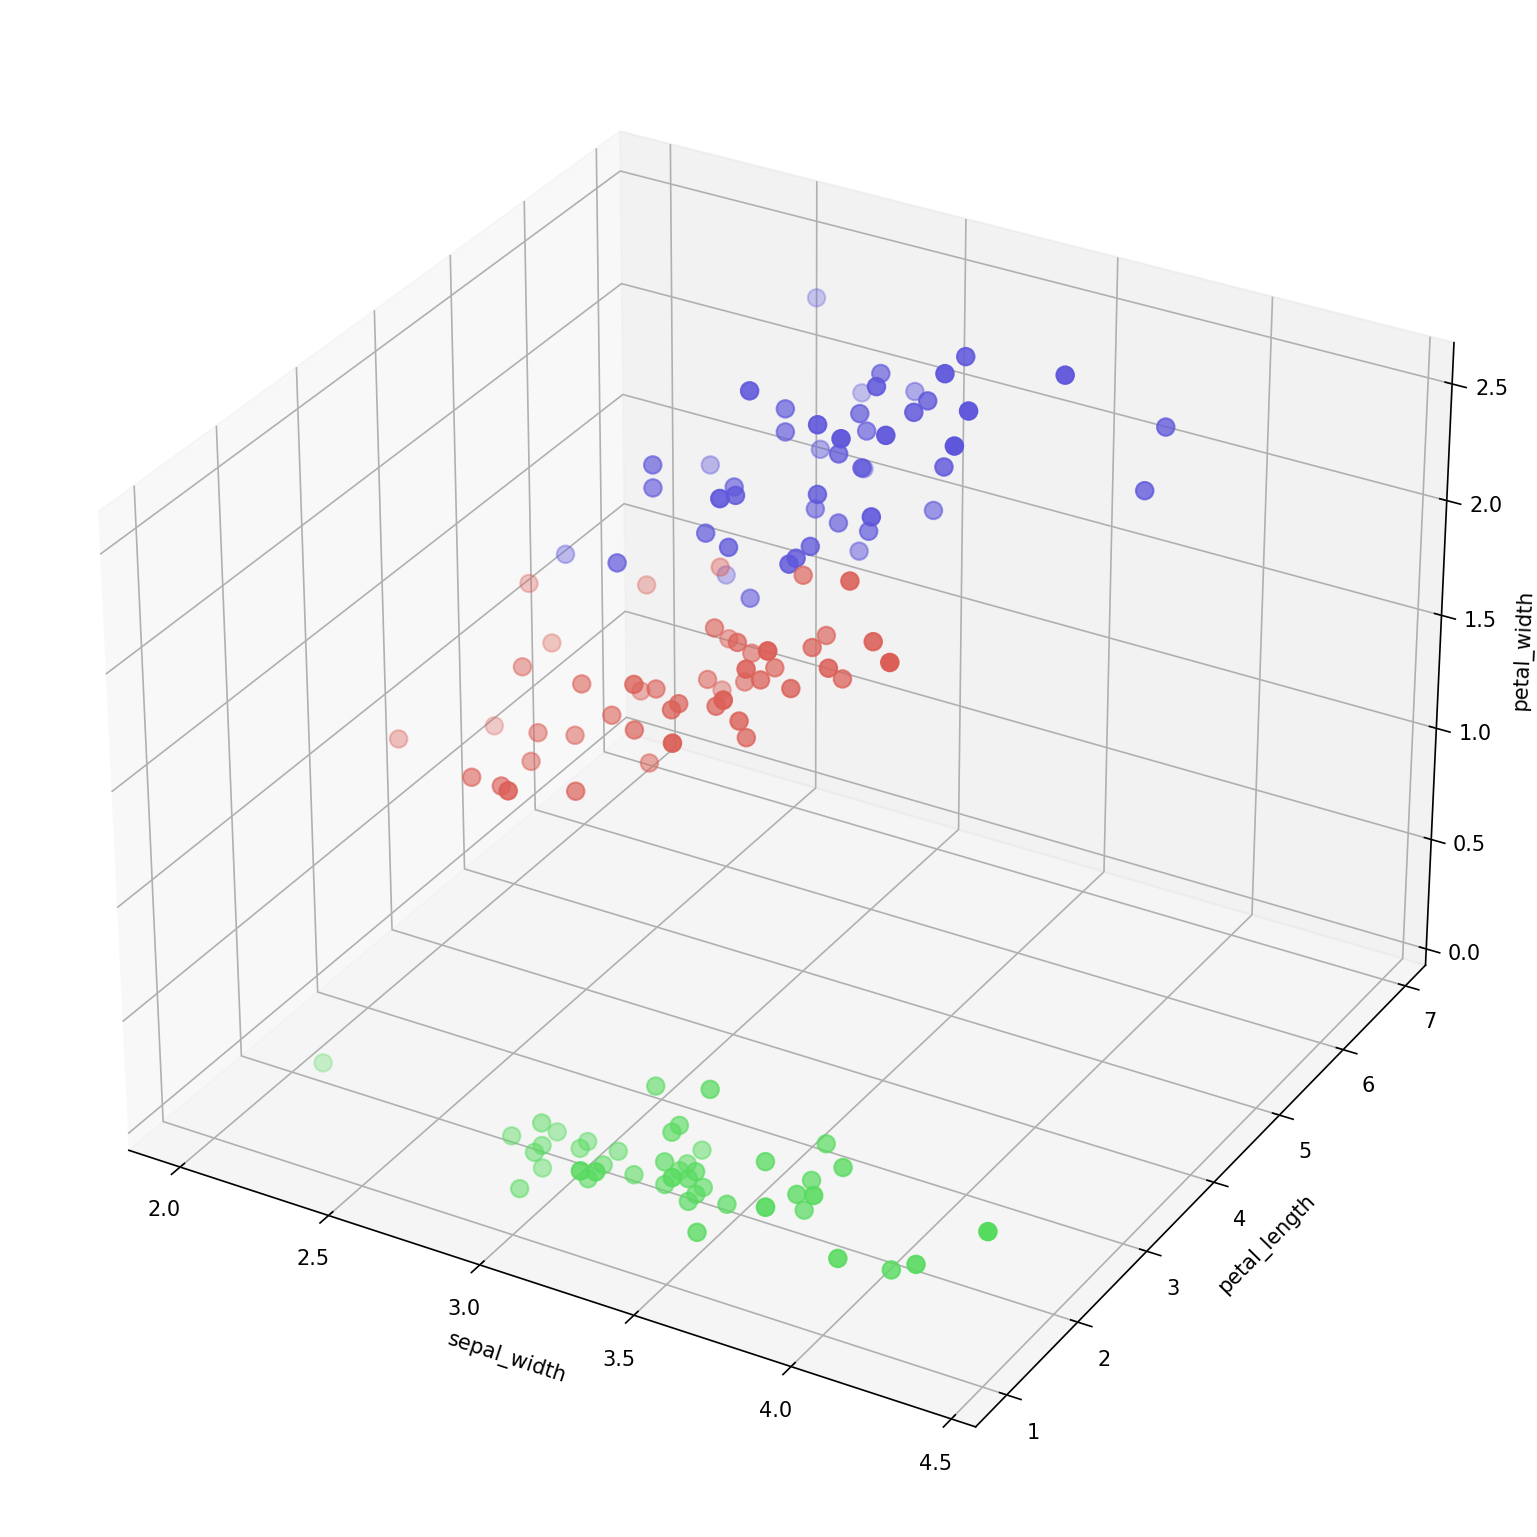

In [20]:
ax_list = [[2, 1, 0], [1, 0, 3], [0, 2, 3], [1, 2, 3]]
for i in ax_list:
    show_3d(df, i)

- show the radar plot of the four attributes for different species

In [21]:
from pyecharts import options as opts
from pyecharts.charts import Radar

def show_radar(df, colorlist = ['#A8D1D1','#9EA1D4','#FFE288'], alpha = 0.3):
    grouped = df.groupby(by='species')
    v = []
    for label, group in grouped:
        group.drop(axis=1, columns='species', inplace=True)
        v.append(round(group.mean(), 2).tolist())
    v = pd.DataFrame(np.mat(v))
    max_list = v.max() + 0.2
    min_list = v.min() - 0.3
    c = (
        Radar()
        .add_schema(
            schema=[
                opts.RadarIndicatorItem(name='Sepal Length',max_=max_list[0], min_=min_list[0]),
                opts.RadarIndicatorItem(name='Sepal Width', max_=max_list[1], min_=min_list[1]),
                opts.RadarIndicatorItem(name='Petal Length', max_=max_list[2], min_=min_list[2]),
                opts.RadarIndicatorItem(name='Petal Width', max_=max_list[3], min_=min_list[3]),
            ]
        )
    )
    i = 0
    for label, group in grouped:
        group.drop(axis=1, columns='species',inplace=True)
        v = [round(group.mean(), 2).tolist()]
        c.add(
            f'{label}', v,
            color=colorlist[i],
            areastyle_opts = opts.AreaStyleOpts(
                opacity=alpha,
                color=colorlist[i]
            ),
        )
        i += 1
    c.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    c.set_global_opts(title_opts=opts.TitleOpts(title='Iris Radar Plot'))
    return c

In [22]:
show_radar(df).render_notebook()

From the visualization above, we can tell that:
- Iris Setosa: the shortest in sepal length, petal width and petal length, the longest in sepal width.
- Iris Versicolor: the shortest in sepal width, neither the longest nor the shortest in other attributes.
- Iris Virginica: the longest in sepal length, petal width and petal length, middle in sepal width.
